<a href="https://colab.research.google.com/github/Loris997/Learning_portfolio/blob/main/Learning_portfolio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning portfolio 6 - Assignment 6: Theory part, FastAI**





I made a linear regression model with some help of the lesson 5 of fastAI. 




In [2]:
#load all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline
from google.colab import drive
from google.colab import data_table

In [3]:
#Load training and test data
drive.mount('/content/drive')

test = pd.read_csv("/content/drive/My Drive/SE/test.csv")
train = pd.read_csv("/content/drive/My Drive/SE/train.csv")



Mounted at /content/drive


In [4]:
#training data insight
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
#test data insight
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
#shape train dataset
train.shape

(700, 2)

In [7]:
#shape test dataset
test.shape

(300, 2)

**Analysis on train dataset**

In [42]:
#data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       700 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


**Check for missing values**

In [9]:
#check if there are missing values 
train.isna().sum()

x    0
y    1
dtype: int64

In the test dataset are no missing values, but in the training data is.

In [10]:
#check how many values are missing
train['y'].isnull().sum()


1

There is a total of 1 missing value

In [11]:
#get the mode 
modes = train.mode().iloc[0]
modes

x    58.000000
y    -3.839981
Name: 0, dtype: float64

We want to replace the missing value with the mode. Since its just one missing value this doesnt impact the whole dataset that much. If the mode is a tie between two values the iloc guarantees that the first row is used.

In [12]:
#replace the missing value
train.fillna(modes, inplace=True)

In [13]:
#check if there is still a value missing
train['y'].isna().sum()

0

We see that now no values are missing

In [14]:
#check missing values with 'isna' command 
test.isna().sum()

x    0
y    0
dtype: int64

In [15]:
#describe of data
train.describe()


,x,y
count,700.000000,700.000000
mean,54.985939,49.863041
std,134.681703,29.159323
min,0.000000,-3.839981
25%,25.000000,24.805305
50%,49.000000,48.936330
75%,75.000000,74.880631
max,3530.157369,108.871618


**Visualization of train dataset**

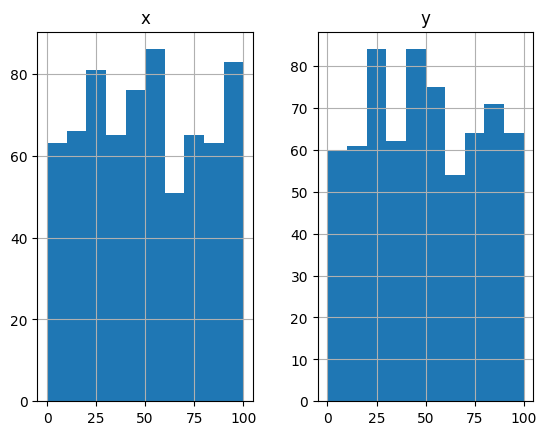

In [16]:
#Histograme
bin_edges = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train.hist(bins = bin_edges)
plt.show()

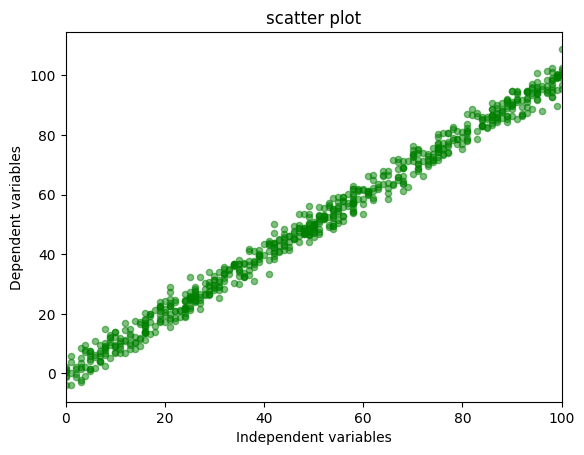

In [17]:
#Scatter plot
plt.scatter(x=train.x, y=train.y, c='green', s=20, alpha=0.5)
plt.title('scatter plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.xlim(0, 100)
plt.show()


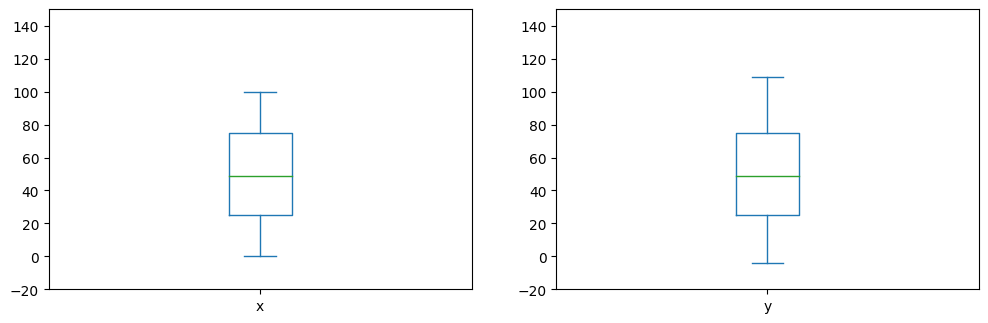

In [23]:
#BoxPlot
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8), ylim=(-20,150))

plt.show()

**Calculate Mean and Variance**

In [24]:
#Calculate mean of list numbers with mean function
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#Calculate varience of list numbers with varience function
def varience(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])


In [26]:
#Input Variable 
X = train.x.values
#Output Variable
y = train.y.values

In [27]:
X_mean, y_mean = mean(X), mean(y)
X_varience = varience(X, X_mean)
y_varience = varience(y, y_mean)

**Calculate Covariance**

Covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.

In [28]:
#Calculate the covarience 
def covarience(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov

**Estimate Coefficients**

In [46]:
#Estimate with coefficient
def coefficients():
    m = covarience(X, X_mean, y, y_mean) / varience(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]

**Make prediction**

In [47]:
#Seprate the test datasets and reshape it
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

In [48]:
# simple_linear_regression() function for prediction
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

In [32]:
predict = simple_linear_regression()

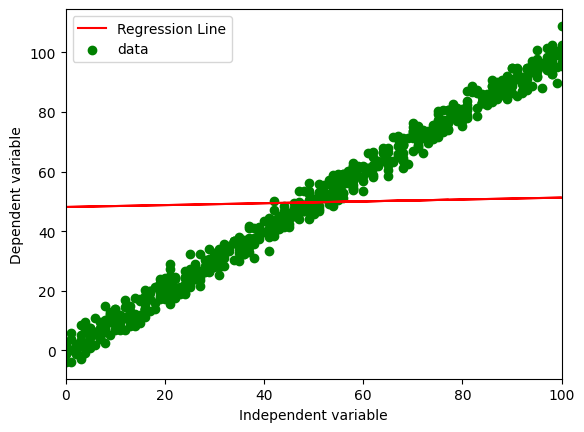

In [37]:
# Ploting Line
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='green')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.xlim(0, 100)

plt.legend()
plt.show()

**Evaluating Model with Root Mean Sqare Error**

I used Root Mean Sqare Error and Coefficient of Determination(R-Sqaure) to evaluate how good my model is.



**RMSE with root_mean_sqaure_error funtion**

In [38]:
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    return rmse

In [39]:
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
print(RMSE[0])

28.171612117472463


**R-Sqaure with followed by r_sqaure function**

In [40]:
def r_sqaure():
    #sst is the total sum of squares and ssr is the total sum of squares of residuals
    sst = 0
    ssr = 0
    m, c = coefficients()
    for i in range(len(X_test)):
        ypred = m*X_test[i] + c
        ssr += (y_test[i] - ypred)**2
        sst += (y_test[i] - y_mean)**2
    return (1-(ssr/sst))

In [41]:
#R-Sqaure
score = r_sqaure()
print(score[0])

0.059818751967545936


The R-square value is somewhat of close to 0, therefore the model does rather not model explain variability in the targeted variable (y).